Install the next dependencies:

pip install datasets matplotlib pillow numpy

In [2]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import re
from PIL import Image
import numpy as np
import itertools

Open datasets from HuggingFace

In [3]:
# Original dataset (only 100 images)
dataset_wikiart_768 = load_dataset("Dant33/WikiArt-81K-BLIP_2-768x768", split="train", streaming=True)
dataset_wikiart_768 = list(itertools.islice(dataset_wikiart_768, 100))
#Generated dataset (only 100 images)
dataset_generated = load_dataset("Dant33/Wikiart_with_StableDiffusion", split="train", streaming=True)
dataset_generated = list(itertools.islice(dataset_generated, 100))

README.md:   0%|          | 0.00/6.55k [00:00<?, ?B/s]

c:\Users\navil\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\navil\.cache\huggingface\hub\datasets--Dant33--Wikiart_with_StableDiffusion. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Creating image pairs, from original dataset and generated dataset

In [4]:
def image_pairs(original_dataset, generated_dataset):
    # Create dictionaries to search by key, this makes faster code
    originales = {}
    generados = {}
    
    # Index for original images
    for idx, item in enumerate(original_dataset):
        key = item['__key__']
        originales[key] = idx
    
    # Index for generated images
    for idx, item in enumerate(generated_dataset):
        key = item['__key__']
        # Remove the '_generated' word for better searching
        base_key = key.replace('_generated', '')
        generados[base_key] = idx
    
    # Finding matches
    pares = []
    for key_original in originales:
        if key_original in generados:
            original_idx = originales[key_original]
            generado_idx = generados[key_original]
            pares.append((original_idx, generado_idx, key_original))
    
    return pares

# Create pairs
pares = image_pairs(dataset_wikiart_768, dataset_generated)
print(f"Se encontraron {len(pares)} pares de imágenes")

Se encontraron 5 pares de imágenes


If you want to show image pairs use the following code

No. de par 1


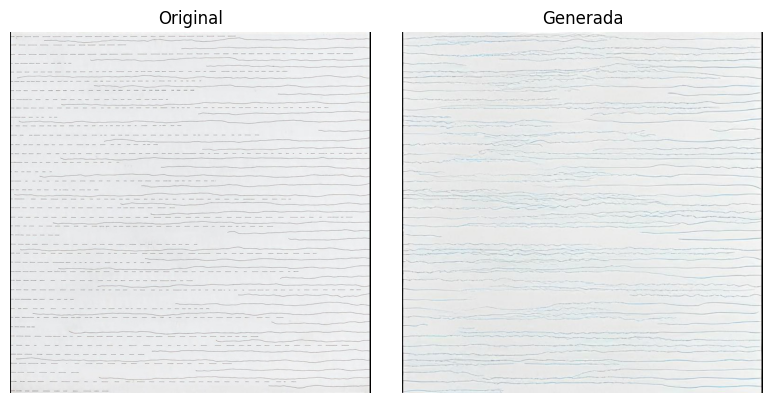

----------------------------------------------------------------------------------------------------
No. de par 2


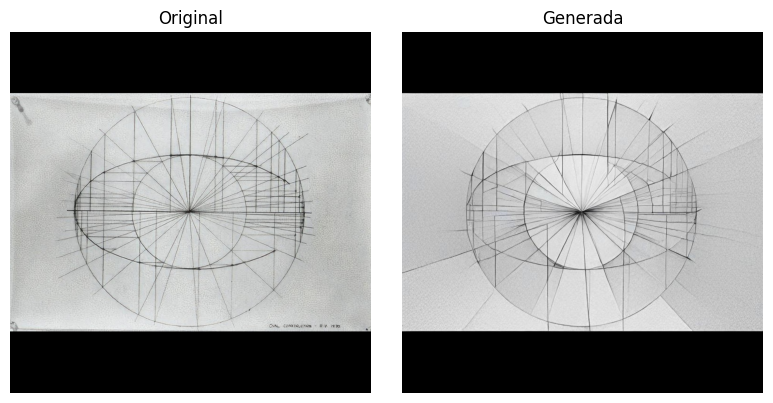

----------------------------------------------------------------------------------------------------
No. de par 3


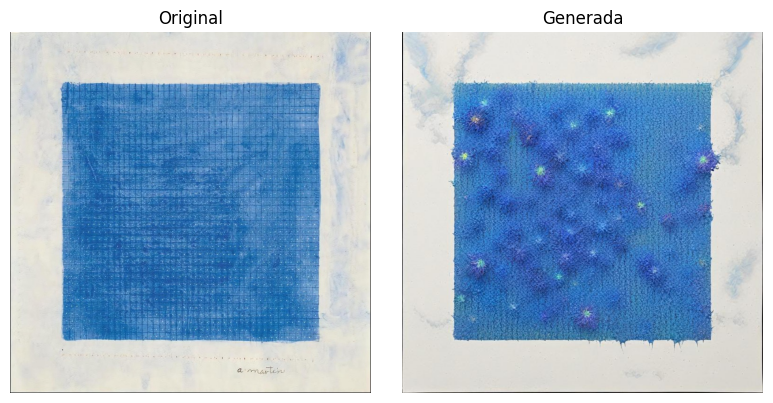

----------------------------------------------------------------------------------------------------


In [10]:
def show_pairs(original_dataset, generated_dataset, pairs, num_examples=3):

    for i, (idx_orig, idx_gen, key) in enumerate(pairs[:num_examples]):
        print('No. de par',i+1)
        # Obtener imágenes
        img_original = original_dataset[idx_orig]['jpg']
        img_generada = generated_dataset[idx_gen]['jpg']
        
        # Mostrar ambas imágenes juntas
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
        
        ax1.imshow(img_original)
        ax1.set_title('Original')
        ax1.axis('off')
        
        ax2.imshow(img_generada)
        ax2.set_title('Generada')
        ax2.axis('off')
        plt.tight_layout()
        plt.show()

        print("-" * 100)


if pares:
    show_pairs(dataset_wikiart_768, dataset_generated, pares)
else:
    print("No se encontraron pares coincidentes en los primeros 100 ejemplos.")